

# An Analysis of Customer Types

## Objective:
Comparing the implementation and visualisation techniques between Kmeans++ Clustering and Hierarchical Agglomerative Clustering. 

Scenario: To support a business owner analysing her customer base, by identifying the total number of customer groups for her business. Allowing the business owner to map and plan ahead of current and future services. 

---

### Dataset: 
Matrix of Features: 200 x 6

Shop_Customers.csv

---

#### Machine Learning Techniques Applied: 
  
1) K-means Clustering

2) K-means++ Clustering 

3) Hierarchical Agglomerative Clustering

4) Analysis of Clusters Seperation 

5) Visualisation Methods: Elbow Method vs Silhouette Analysis vs Dendrogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
dataset = pd.read_csv('Shop_Customers.csv')
X = dataset.iloc[:, [3,4]].values  
dataset.head()

,CustomerID,Genre,Age,Annual Income (£k),Spending Ratings (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Find optimal nubmer of clusters using Elbow Method

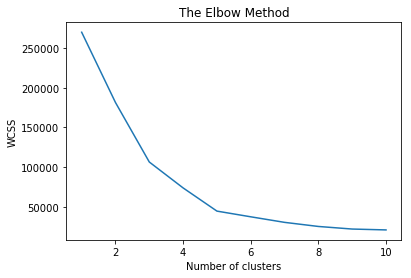

In [2]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying k-means++ clustering to the dataset with optimal numbers of clusters
Based on the The Elbow Method above, the optimal number of clusters is n_clusters = 5. 

Each data point will be reassigned to one of the 5 nearest clusters centroid.

This will result in 5 respective segments, each customer segment exhibit a certain behaviour. 

In [3]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters with optimal number of clusters
Remember that: scatter(X[row, coluumn])

row of X:

    y_kmeans == 0 refers to the first cluster, where y_kmeans starts at 0, in this example the range is 0 to 4)

column of X:

    0 refers to the column of X,i.e., Salary

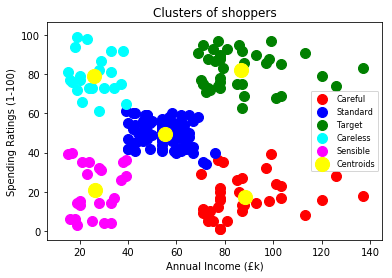

In [4]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income (£k)')
plt.ylabel('Spending Ratings (1-100)')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()

# Silhouette Analysis with optimal number of clusters 
* The silhouette_score gives the average value for all the samples.
* This gives a perspective into the density and separation of the formed clusters.
* The thickness of the silhouette represents the cluster size. The relatively large cluster(s) indicates there are sub clusters within. 
* Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

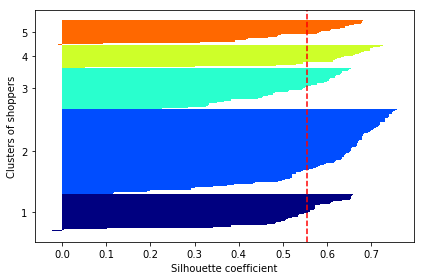

In [5]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

plt.gcf().clear() #clear previous plot
cluster_labels = np.unique(y_kmeans)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_kmeans, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Clusters of shoppers')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [6]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("For clusters = 5", "The average silhouette_score is :", silhouette_avg)

For clusters = 5 The average silhouette_score is : 0.553931997445


# Clustering with non-optimal number of clusters

In [7]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters with non-optimal number of clusters

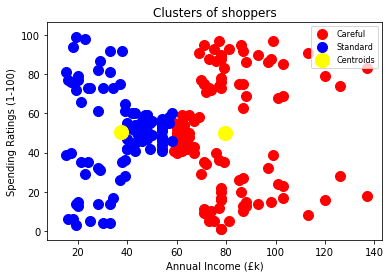

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income (£k)')
plt.ylabel('Spending Ratings (1-100)')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show() 

# Silhouette Analysis with non-optimal number of clusters
* The silhouette_score gives the average value for all the samples.
* This gives a perspective into the density and separation of the formed clusters.
* The thickness of the silhouette represents the cluster size. The relatively large cluster(s) indicates there are sub clusters within. 
* Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

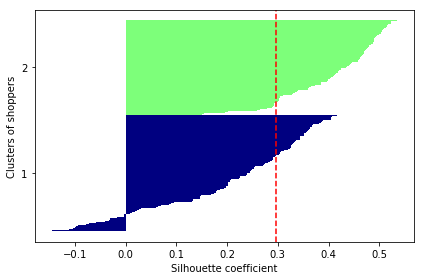

In [9]:
plt.gcf().clear() #clear previous plot
cluster_labels = np.unique(y_kmeans)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_kmeans, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Clusters of shoppers')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [10]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("For clusters = 2", "The average silhouette_score is :", silhouette_avg)

For clusters = 2 The average silhouette_score is : 0.29689691625


# Find the optimal number of clusters using dendrogram
Using Dendrogram to find the optimal number of clusters' profiles
* The vertical axis of the dendrogram represents the euclidean distances or dissimilarity between clusters. 
* The horizontal axis represents all possible clusters compounds.   
* Based on the respective analysis objective, dissimilarity threshold in terms of euclidean distances can be set across the dendrogram to define the number of clusters that meet the required threshold.  
* The optimal number of clusters can be found by first locating the highest vertical axis without cutting the horizontal axis. Then count the total number of vertical axis that meet this criteria. In this case study, there are 5 axes. 

In [11]:
#import dataset
dataset = pd.read_csv('Shop_Customers.csv')
X = dataset.iloc[:, [3,4]].values  
dataset.head()

,CustomerID,Genre,Age,Annual Income (£k),Spending Ratings (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


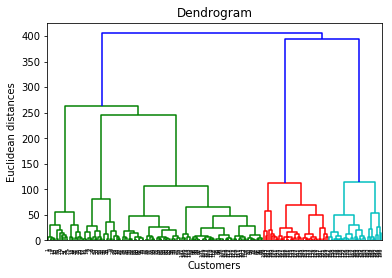

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Agglomerative Clustering with optimal number of clusters

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters with optimal number of clusters
Remember that: scatter(X[row, column])

row of X:

    y_hc == 0 refers to the first cluster, where y_hc starts at 0, in this example the range is 0 to 4)

column of X:

    0 refers to the column of X,i.e., Salary

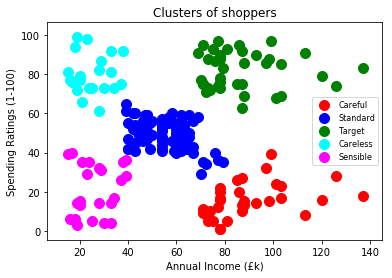

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3,1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income (£k)')
plt.ylabel('Spending Ratings (1-100)')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()